In [2]:
import geopandas as gpd

# Load the shapefile
shapefile_path = "../data/DUBLIN 2000_2021_ITM/DUShorelines_OSi.shp"  # Update with actual path
gdf = gpd.read_file(shapefile_path)

# Display the first few rows
print(gdf.head())

print(gdf['DATE_'])

        DATE_  OBJECTID                                       Shoreltype  \
0  06/06/2014         5                     Vegetation Line ITM/OSi 2014   
1  06/06/2013         4                     Vegetation Line ITM/OSi 2013   
2  08/09/2000         1                     Vegetation Line ITM/OSi 2000   
3  01/07/2011         3  Vegetation Line OSi ITM/DGlobe Dublin July 2011   
4  06/06/2019         7                     Vegetation Line ITM/OSi 2019   

   UNCERTAINT     Shape_Leng  \
0         1.0   28656.892288   
1         1.0   69477.078697   
2         2.0  104443.420728   
3         1.0   92525.967523   
4         1.0   81552.076187   

                                            geometry  
0  MULTILINESTRING Z ((725802.287 759521.405 0, 7...  
1  MULTILINESTRING Z ((724951.004 740829.085 0, 7...  
2  MULTILINESTRING Z ((722927.312 752704.099 0, 7...  
3  MULTILINESTRING Z ((720223.305 764397.783 0, 7...  
4  MULTILINESTRING Z ((721301.735 733825.41 0, 72...  
0    06/06/2014
1   

In [3]:
gdf.columns

Index(['DATE_', 'OBJECTID', 'Shoreltype', 'UNCERTAINT', 'Shape_Leng',
       'geometry'],
      dtype='object')

In [6]:
import os
import glob
import rasterio
from rasterio.merge import merge
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

# Define the directory containing TIFF images
tif_dir = "../data/howth_ariel_2019"  # Update with your path

# Get a list of all .tif files
tif_files = glob.glob(os.path.join(tif_dir, "*.tif"))

# Open and merge the raster files
src_files = [rasterio.open(tif) for tif in tif_files]
mosaic, transform = merge(src_files)

# Update metadata
meta = src_files[0].meta.copy()
meta.update({"height": mosaic.shape[1], "width": mosaic.shape[2], "transform": transform})

# Close files
for src in src_files:
    src.close()

# Plot the merged raster
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(mosaic[0], cmap="gray", extent=(transform[2], transform[2] + meta["width"] * transform[0], 
                                           transform[5] + meta["height"] * transform[4], transform[5]))


: 

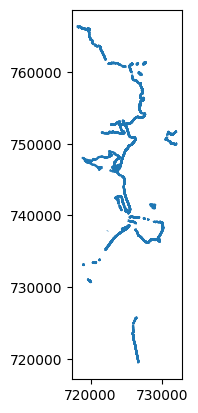

In [4]:
import matplotlib.pyplot as plt

gdf.plot()
plt.show()